In [52]:
import cv2
import itertools
import numpy as np
from matplotlib import pyplot as plt


In [53]:
imgL = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('/content/teddyl.jpg', cv2.IMREAD_GRAYSCALE)

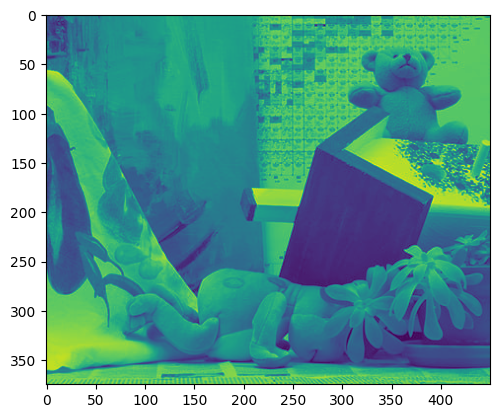

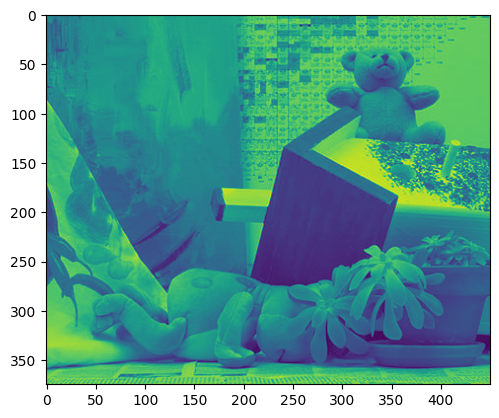

In [54]:
plt.imshow(imgL)
plt.figure()
plt.imshow(imgR)

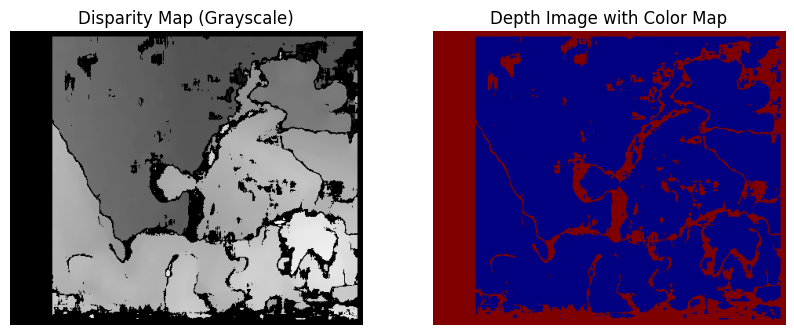

In [55]:
# Create a StereoBM object to compute disparity
stereo = cv2.StereoBM_create(numDisparities=48, blockSize=15)

# Compute the disparity map
disparity = stereo.compute(imgL, imgR).astype(np.float32)

focal_length = 150
baseline = 0.1

disparity[disparity <= 0] = 0.1  # Set minimum disparity to a small value

depth_map = (focal_length * baseline) / disparity

depth_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)
depth_colormap = cv2.applyColorMap(np.uint8(depth_normalized), cv2.COLORMAP_JET)
cv2.imwrite('depth_colormap.png', depth_colormap)

plt.figure(figsize=(10, 5))
# Display the original disparity map (in grayscale)
plt.subplot(1, 2, 1)
plt.imshow(disparity, cmap='gray')
plt.title('Disparity Map (Grayscale)')
plt.axis('off')

# Display the color-mapped depth image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.title('Depth Image with Color Map')
plt.axis('off')

# Show the plots
plt.show()
